## 4. Plotting bias and variance

In this problem, we'll investigate the bias and the variance of two different estimators. We'll see (once again) that fitting the data more precisely is not always a good idea.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(4741)

### a)

Suppose we have a sinusoid function $f(x)=10\sin(x)$. Our dataset $\mathcal D$ will consist of $n=7$ data points drawn from the following probabilistic model. For each data point $x_i$ we randomly draw uniformly in $[0,6]$ and observe a noisy $y_i=f(x_i)+\epsilon_i$, where $\epsilon_i$ is some noise drawn from a standard normal distribution $\mathcal N(0,1)$.

Generate a sample dataset from this distribution. Plot this dataset $\mathcal D$ and the true function $f(x)$.

In [2]:
sample_size = 7
X = np.random.uniform(0, 6, sample_size)
E = np.random.randn(sample_size)
Y = 10 * np.sin(X) + E

/Users/zhaiguankai/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


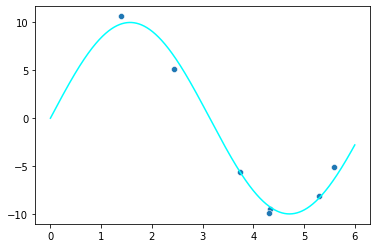

In [3]:
import seaborn as sns
sns.scatterplot(X, Y)

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

def f(x):
    return 10 * np.sin(x)

x = np.linspace(0, 6, 1000)

plt.plot(x, f(x), color='cyan')

plt.show()

### b)

Fit a linear model $l(x)=w_0+w_1x$ to $\mathcal D$.
Plot this linear model $l(x)$ together with $\mathcal D$ and $f(x)$.

In [4]:
from sklearn.linear_model import LinearRegression
X_local = np.reshape(X, (sample_size, 1))
ones = np.ones((sample_size, 1))
X_local = np.hstack((X_local, ones))
Y_local = np.reshape(Y, (sample_size, 1))
model = LinearRegression(fit_intercept=False).fit(X_local, Y_local)
model.coef_[0]

array([-4.55904803, 14.44041133])

/Users/zhaiguankai/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


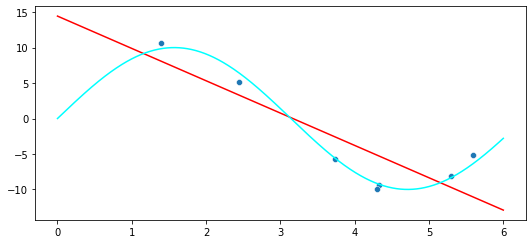

In [5]:
sns.scatterplot(X, Y)

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

def lin(x):
    return model.coef_[0,0] * x + model.coef_[0,1]

def f(x):
    return 10 * np.sin(x)

x = np.linspace(0, 6, 1000)

plt.plot(x, lin(x), color='red')
plt.plot(x, f(x), color='cyan')

plt.show()

### c)

Fit a cubic model $c(x)=w_0+w_1x+w_2x^2+w_3x^3$ to $\mathcal D$.
Plot this cubic model $c(x)$ together with $\mathcal D$ and $f(x)$.

In [6]:
X_local = np.reshape(X, (sample_size, 1))
ones = np.ones((sample_size, 1))
squared = np.square(X_local)
cubed = np.power(X_local, 3)
X_local = np.hstack((ones, X_local, squared, cubed))
Y_local = np.reshape(Y, (sample_size, 1))
model = LinearRegression(fit_intercept=False).fit(X_local, Y_local)
model.coef_[0]

array([-1.6967751 , 20.44144387, -9.8465093 ,  1.0868115 ])

/Users/zhaiguankai/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


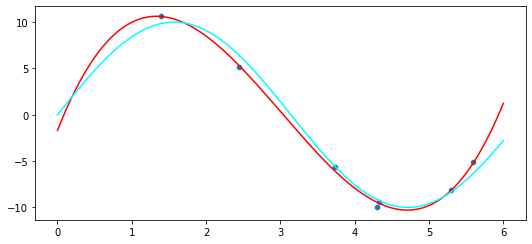

In [7]:
sns.scatterplot(X, Y)

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

def cube(x):
    squared = np.square(x)
    cubed = np.power(x, 3)
    return model.coef_[0,3] * cubed + model.coef_[0,2] * squared + model.coef_[0,1] * x + model.coef_[0, 0]

def f(x):
    return 10 * np.sin(x)

x = np.linspace(0, 6, 1000)

plt.plot(x, cube(x), color='red')
plt.plot(x, f(x), color='cyan')

plt.show()

### d)

Repeat parts b) and c) for 1000 different randomly drawn sets $\mathcal D$.

Average the 1000 linear models you generated to get the average linear model $\bar{l}(x)$. Plot $\bar{l}(x)$ with $f(x)$.

Generate the average cubic model $\bar{c}(x)$ in the same way, and plot it together with $f(x)$.

In [8]:
wbs = np.zeros((1000, 2))
for i in range(1000):
    X = np.random.uniform(0, 6, sample_size)
    E = np.random.randn(sample_size)
    Y = 10 * np.sin(X) + E
    X_local = np.reshape(X, (sample_size, 1))
    ones = np.ones((sample_size, 1))
    X_local = np.hstack((X_local, ones))
    Y_local = np.reshape(Y, (sample_size, 1))
    model = LinearRegression(fit_intercept=False).fit(X_local, Y_local)
    wbs[i] = model.coef_[0]
wb = np.average(wbs, axis = 0)

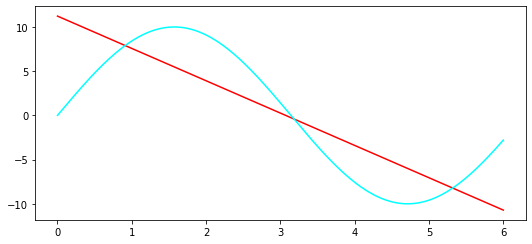

In [9]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

def lin(x):
    return wb[0] * x + wb[1]

def f(x):
    return 10 * np.sin(x)

x = np.linspace(0, 6, 1000)

plt.plot(x, lin(x), color='red')
plt.plot(x, f(x), color='cyan')

plt.show()

In [10]:
wcs = np.zeros((1000, 4))
for i in range(1000):
    X = np.random.uniform(0, 6, sample_size)
    E = np.random.randn(sample_size)
    Y = 10 * np.sin(X) + E
    X_local = np.reshape(X, (sample_size, 1))
    ones = np.ones((sample_size, 1))
    squared = np.square(X_local)
    cubed = np.power(X_local, 3)
    X_local = np.hstack((ones, X_local, squared, cubed))
    Y_local = np.reshape(Y, (sample_size, 1))
    model = LinearRegression(fit_intercept=False).fit(X_local, Y_local)
    wcs[i] = model.coef_[0]
wc = np.average(wcs, axis = 0)
wc

array([-3.62124726, 21.34026987, -9.65795076,  1.02877621])

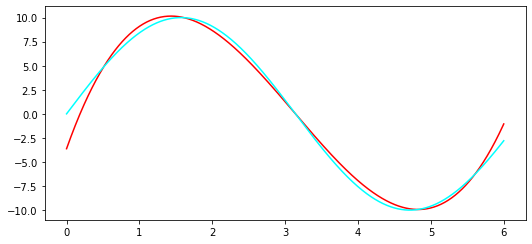

In [11]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

def cube(x):
    squared = np.square(x)
    cubed = np.power(x, 3)
    return wc[3] * cubed + wc[2] * squared + wc[1] * x + wc[0]

def f(x):
    return 10 * np.sin(x)

x = np.linspace(0, 6, 1000)

plt.plot(x, cube(x), color='red')
plt.plot(x, f(x), color='cyan')

plt.show()

### e)

Describe the squared bias graphically with respect to the two plots in part d). Compute the squared bias of $\bar{l}(x)$ and $\bar{c}(x)$. Which model has smaller squared bias?

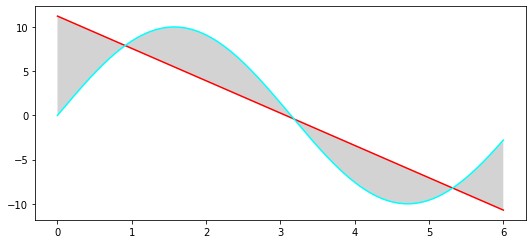

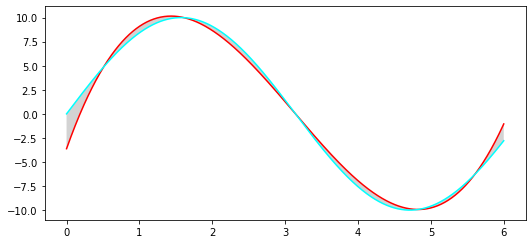

In [12]:
import scipy.integrate as integrate

x = np.linspace(0, 6, 1000)
plt.plot(x, lin(x), color='red')
plt.plot(x, f(x), color='cyan')
plt.fill(np.append(x, x[::-1]), np.append(lin(x), f(x)[::-1]), 'lightgrey')
plt.show()
x = np.linspace(0, 6, 1000)
plt.plot(x, cube(x), color='red')
plt.plot(x, f(x), color='cyan')
plt.fill(np.append(x, x[::-1]), np.append(cube(x), f(x)[::-1]), 'lightgrey')
plt.show()

In [13]:
import math
linear_f = lambda x: wb[0] * x + wb[1]
f = lambda x: 10 * math.sin(x)

bias_f = lambda x: (linear_f(x) - f(x))**2

area = integrate.quad(bias_f, 0, 6) 
linear_bias = area[0] / 6
print("The squared bias for the linear model is: " + str(linear_bias))

The squared bias for the linear model is: 17.299593557880307


In [14]:
import math
cubic_f = lambda x: wc[3] * x**3 + wc[2] * x**2 + wc[1] * x + wc[0]
f = lambda x: 10 * math.sin(x)

bias_f = lambda x: (cubic_f(x) - f(x))**2

area = integrate.quad(bias_f, 0, 6) 
cubic_bias = area[0] / 6
print("The squared bias for the cubic model is: " + str(cubic_bias))

The squared bias for the cubic model is: 0.4762196102125175


##### The cubic model has a significantly lower squared bias.

### f)

Compute the variance of $\bar{l}(x)$ and $\bar{c}(x)$. Which model has smaller variance? How do you interpret this? Which model has smaller overall error?

In [15]:
expected_diff = np.zeros((1000, 2))
e_linear = lambda x: wb[0] * x + wb[1]
e_cubic = lambda x: wc[3] * x**3 + wc[2] * x**2 + wc[1] * x + wc[0]
for i in range(1000):
    linear_f = lambda x: wbs[i, 0] * x + wbs[i, 1]
    cubic_f = lambda x : wcs[i, 3] * x**3 + wcs[i, 2] * x**2 + wcs[i, 1] * x + wcs[i, 0]

    linear_d = lambda x: (linear_f(x) - e_linear(x))**2
    cubic_d = lambda x: (cubic_f(x) - e_cubic(x))**2
    
    expected_diff[i, 0] = integrate.quad(linear_d, 0, 6)[0]/6
    expected_diff[i, 1] = integrate.quad(cubic_d, 0, 6)[0]/6
variances = np.average(expected_diff, axis = 0)
linear_var = variances[0]
cubic_var = variances[1]
print("The variance of the linear model is: " + str(linear_var))
print("The variance of the cubic model is: " + str(cubic_var))

The variance of the linear model is: 10.133874164564425
The variance of the cubic model is: 297.16183752055133


In [16]:
print("The overall error of the linear model is: " + str(linear_var + linear_bias))
print("The overall error of the cubic model is: " + str(cubic_var+ cubic_bias))

The overall error of the linear model is: 27.433467722444732
The overall error of the cubic model is: 297.63805713076385


##### The linear model has a smaller variance. This means that its results are more stable (i.e. the produced model is closer to the expected model over all possible datasets) when my training data changes . This makes sense as the linear model is less complex and less likely to overfit. The linear model has a smaller overall error since its sum of variance and bias is smaller than that of the cubic model.

### g)

How do you think your results would depend on the number of points in the data set $\mathcal D$? Feel free to perform an experiment to check. How many points would you need before the opposite model (from your answer in the previous question) has smaller overall error?

##### The variances of the two models would both decrease. The variance of the cubic model decreases faster. The biases do not change much, although it does decrease a little. My experiments show that the overall error of the cubic model is smaller when the sample size is equal to or larger than 8. 